---

#### Question: 
Using *The Guardian* API, compare Australian and United Kingdom headlines about the war in Ukraine. What can we learn about differences and similarities between the news presented to Australia and the UK?

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)


In [1]:
# importing required libraries for this task

import requests
import json


### 1. Question


We have a concern if the Gurdian office in Australia and in the UK have the same approach towards the war in Ukraine. Do they seem neutral or they seem to be projectiing a certain attitude towards the war? If the latter, are both offices on the same page or persuing different editorial policies? We can probably best answer these questions by comparing the headlines published in both offices since the begining of the war on the 24th of February 2022. 

### 2. Data

In [2]:

# I loaded the Guardian API key

with open('guardian_key.txt', 'r') as file: #Please, insert your key in a file named 'guardian_key.txt'
    key = file.read().strip() 
len(key)

36

In [4]:
baseUrl = 'https://content.guardianapis.com/search?q='
searchString = "Ukraine AND war"
production_office = "aus"
fromDate = "2022-02-24"

#I set page-size=150, by default the API returns only 10 results, 200 is...(continued in nextline)  
#max but API returns an error most of the time and it is too risky to work with.

url = baseUrl+searchString+'&production-office='+production_office+'&from-date='+fromDate+'&page-size=150&api-key='+key
#print(url)
#I didn't run this line of the code to hide my API key.


In [5]:
# get data from server
response = requests.get(url)

In [6]:
response

<Response [200]>

In [7]:
#response.content
# I didn't run this line of code to avoid a large cell in the middle of the analysis. 


In [8]:
data = json.loads(response.content)
#data
# I didn't run this line of code to avoid a large cell in the middle of the analysis. 


In [9]:
results = data['response']['results']
#results
# I didn't run this line of code to avoid a large cell in the middle of the analysis. 


In [10]:
for result in results:
    b1=result['webTitle']
    #print(b1)
    # I didn't run this line of code to avoid a large cell in the middle of the analysis. 


## Australian Headlines

In [11]:
Aus_titles= [ ]
for result in results:
    Aus_titles.append(result['webTitle'])
Aus_titles
    


['Russia-Ukraine war live: Ukraine ‘buying time’ in Bakhmut – as it happened',
 'Russia-Ukraine war live: Putin visits Mariupol in first trip to occupied eastern Ukraine – as it happened',
 'Russia-Ukraine war live: Ukraine struggling to hold Bakhmut, military sources say — as it happened',
 'Russia-Ukraine war live: Ukraine ‘expects possible major Russian offensive this month’ – as it happened',
 'Russia-Ukraine war: UN says Russia has committed ‘wide range’ of war crimes; Poland to transfer four MIG-29 planes to Ukraine – as it happened',
 'Russia-Ukraine war live: Ukraine aiming for peace summit in February, says foreign minister',
 'Russia-Ukraine war live: Bakhmut ‘killing zone’ hampering Wagner – as it happened',
 'Russia-Ukraine war: Ukraine first lady urges UK to support special tribunal for Russian war crimes – as it happened',
 'Russia-Ukraine war live: Germany to send Leopard 2 tanks to Ukraine, reports say — as it happened ',
 'Russia-Ukraine war: Putin replaces general in 

I want to know how many headlines are published in the Australian office about the Ukraine war since it's beginning on the 24th of February 2022? This is a valid and relevent question for this type of quest, though we could only access freely to a limited number of API returns, so the number comes back as the same number we have already had for our search, i.e. 150. 

In [12]:
len(Aus_titles)

150

In order to familiarize myself with the data more, I wondered what are the most frequent words in the data set. I used the code below, just to get an idea of the most repeated words in the headlines. 

In [13]:
import re
from collections import Counter


joinedString = '. '.join(Aus_titles) #joins all the titles
joinedString = joinedString.lower()

from gensim.parsing.preprocessing import remove_stopwords

filtered_sentence = remove_stopwords(joinedString)
filtered_sentence = re.sub(r'[^\w\s]', ' ', filtered_sentence)

#print(filtered_sentence)
  
# split() returns list of all the words in the string
split_it = filtered_sentence.split()
  
# Pass the split_it list to instance of Counter class.
Countervar = Counter(split_it)
  
# most_common() produces k frequently encountered input values and...
# their respective counts.
most_occur = Countervar.most_common(20)
  
print(most_occur)


[('ukraine', 175), ('war', 155), ('russia', 151), ('invasion', 77), ('know', 76), ('day', 75), ('glance', 74), ('happened', 56), ('live', 29), ('russian', 19), ('says', 17), ('putin', 12), ('kyiv', 8), ('moscow', 7), ('week', 7), ('bakhmut', 6), ('kherson', 6), ('catch', 6), ('must', 6), ('read', 6)]


I visualised the most frequent words, to understand them easier. 

<AxesSubplot:xlabel='word'>

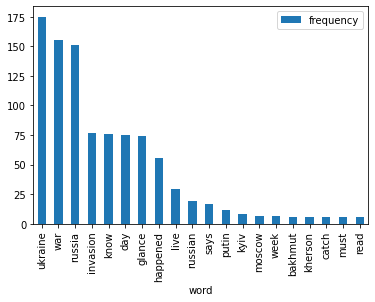

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(most_occur, columns=['word', 'frequency'])
df.plot(kind='bar', x='word')

## United Kingdom Headlines

We repeat almost the same codes as above to get the headlines from the UK office, too. 

In [16]:
baseUrl = 'https://content.guardianapis.com/search?q='
searchString = "Ukraine AND war"
production_office = "UK"
fromDate = "2022-02-24"

url2 = baseUrl+searchString+'&production-office='+production_office+'&from-date='+fromDate+'&page-size=150&api-key='+key
#print(url2)

In [17]:
# get data from server
response = requests.get(url2)

In [18]:
response

<Response [200]>

In [19]:
# I didn't run this line of code to avoid a large cell in the middle of the analysis. 

#response.content

In [20]:
data2 = json.loads(response.content)
#data2
# I didn't run this line of code to avoid a large cell in the middle of the analysis. 


In [21]:
results2 = data2['response']['results']
#results2
# I didn't run this line of code to avoid a large cell in the middle of the analysis. 


In [22]:
for result in results2:
    b=result['webTitle']
    #print(b)
    # I didn't run this line of code to avoid a large cell in the middle of the analysis. 


In [23]:
UK_titles= [ ]
for result in results2:
    UK_titles.append(result['webTitle'])
UK_titles
    


['Windows on a war: Miguel Gutiérrez’s photographs of Ukraine',
 'War in Ukraine defining new world order, says thinktank',
 'The Guardian view on war in Ukraine: reshaping the world | Editorial',
 'Russian minister’s claim Ukraine war ‘launched against us’ met with laughter',
 'Russian forces could regain initiative as Ukraine war drags on',
 'Shell and Vitol accused of prolonging Ukraine war with sanctions ‘loophole’',
 'Sunak urges Europe to use weapons stockpiles to help Ukraine war',
 'Ukraine war ‘over’ unless EU boosts military support, says top diplomat',
 'European gas prices fall to pre-Ukraine war level ',
 'The ‘silent victim’: Ukraine counts war’s cost for nature',
 'Splitting the atomic scientists: how the Ukraine war ruined physics',
 'Grief and defiance in Kyiv on first anniversary of war in Ukraine',
 'Norway urged to step up Ukraine support after profiting from war',
 'Year of war in Ukraine tests China’s ‘no limits’ relationship with Russia',
 'Win, lose, stalemate o

In [24]:
len(UK_titles)

150

Again, I tried to get an idea of the most frequent words in the UK headlines. 

In [25]:

from collections import Counter

joinedString2 = '. '.join(UK_titles) #joins all the titles
joinedString2 = joinedString2.lower()
filtered_sentence2 = remove_stopwords(joinedString2)
filtered_sentence2 = re.sub(r'[^\w\s]', ' ', filtered_sentence2)

# split() returns list of all the words in the string
split_it2 = filtered_sentence2.split()
  
# Pass the split_it list to instance of Counter class.
Counter2 = Counter(split_it2)
  
# most_common() produces frequently encountered...
# input values and their respective counts.
most_occur2 = Counter2.most_common(20)
  
print(most_occur2)



[('ukraine', 148), ('war', 108), ('russia', 50), ('s', 33), ('invasion', 25), ('day', 23), ('russian', 22), ('glance', 22), ('know', 22), ('says', 16), ('putin', 11), ('year', 10), ('end', 7), ('uk', 7), ('amid', 7), ('world', 6), ('forces', 5), ('military', 5), ('china', 5), ('tanks', 5)]


<AxesSubplot:xlabel='word'>

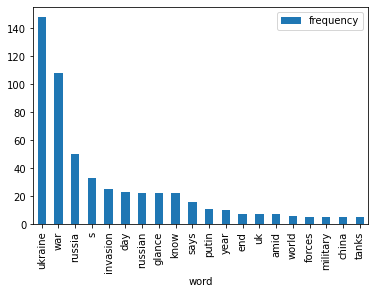

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.DataFrame(most_occur2, columns=['word', 'frequency'])
df2.plot(kind='bar', x='word')

### 3. Analysis

When I got an idea of the most frequent words above, I decided to pick a few of the most relevant and frequent ones to analyze and compare them further in both Australian and UK headlines. I needed a more accurate counting on those words. 
The words I picked for my analysis are:
* Australia 
* Ukraine 
* Russia
* China
* Zelenskiy
* Putin



I defined a function for counting each of those words to make it eaiser and to avoid writing a code for each one of them seperately. 

In [27]:
def count_occurences (mylist, myword, extra_char_length):
    count = 0
    for x in mylist:
        filtered_x = remove_stopwords(x)
        filtered_x = re.sub(r'[^\w\s]', ' ', filtered_x)

        p=re.findall(r'\b'+myword+r'.{0,'+str(extra_char_length)+r'}\b',filtered_x, re.IGNORECASE)
        # \b allows me to perform a “whole words only” search using a regular expression in the form of \bword\b
        # I used r'\b' to ensure whole words are selected. Otherwise, when I search for "war" it will find "toward", "warning" and "warn" as well.
        count+=len(p)
    return count

In [28]:
count_occurences(Aus_titles, 'Australia', 2) # last argument (2) means Australia, AustraliaN, and AustraliaNS are acceptable

1

In [29]:
count_occurences(UK_titles, 'Australia', 2)

0

In [30]:
count_occurences(Aus_titles, 'ukrain', 3)

177

In [31]:
count_occurences(UK_titles, 'ukrain', 3)

148

In [32]:
count_occurences(Aus_titles, 'russia', 3)

170

In [33]:
count_occurences(UK_titles, 'russia', 3)

76

In [34]:
count_occurences(Aus_titles, 'chin', 4)

3

In [35]:
count_occurences(UK_titles, 'chin', 4)

6

In [36]:
count_occurences(Aus_titles, 'war', 0) 


155

In [37]:
count_occurences(UK_titles, 'war', 0)

108

In [38]:
count_occurences(Aus_titles, 'zelenskiy', 0)

3

In [39]:
count_occurences(UK_titles, 'zelenskiy', 0)

3

In [40]:
count_occurences(Aus_titles, 'putin', 0)

12

In [41]:
count_occurences(UK_titles, 'putin', 0)

11

In [42]:
count_occurences(Aus_titles, 'UK', 0)

5

In [43]:
count_occurences(UK_titles, 'UK', 0)

7

After counting the number of each of the words I was interested in, I made a dataframe to compare the data and visualise them.

In [44]:
df3 = pd.DataFrame(columns=['Australia+', 'UK','Russia+','Ukrain+','China+','War+','Invasion', 'Zelenskiy', 'Putin'], index=['Aus_office','UK_office'])
df3

,Australia+,UK,Russia+,Ukrain+,China+,War+,Invasion,Zelenskiy,Putin
Aus_office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UK_office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df3['Australia+']['Aus_office'] = count_occurences(Aus_titles, 'Australia', 2)
df3['Australia+']['UK_office'] = count_occurences(UK_titles, 'Australia', 2)
df3['Russia+']['Aus_office'] = count_occurences(Aus_titles, 'russia', 3)
df3['Russia+']['UK_office'] = count_occurences(UK_titles, 'russia', 3)
df3['Ukrain+']['Aus_office'] = count_occurences(Aus_titles, 'ukrain', 2)
df3['Ukrain+']['UK_office'] = count_occurences(UK_titles, 'ukrain', 2)
df3['China+']['Aus_office'] = count_occurences(Aus_titles, 'chin', 2)
df3['China+']['UK_office'] = count_occurences(UK_titles, 'chin', 2)
df3['War+']['Aus_office'] = count_occurences(Aus_titles, 'war', 0)
df3['War+']['UK_office'] = count_occurences(UK_titles, 'war', 0)
df3['Zelenskiy']['Aus_office'] = count_occurences(Aus_titles, 'Zelenskiy', 0)
df3['Zelenskiy']['UK_office'] = count_occurences(UK_titles, 'Zelenskiy', 0)
df3['Putin']['Aus_office'] = count_occurences(Aus_titles, 'Putin', 0)
df3['Putin']['UK_office'] = count_occurences(UK_titles, 'Putin', 0)
df3['UK']['Aus_office'] = count_occurences(Aus_titles, 'UK', 0)
df3['UK']['UK_office'] = count_occurences(UK_titles, 'UK', 0)
df3['Invasion']['Aus_office'] = count_occurences(Aus_titles, 'invasion', 0)
df3['Invasion']['UK_office'] = count_occurences(UK_titles, 'invasion', 0)



df3

,Australia+,UK,Russia+,Ukrain+,China+,War+,Invasion,Zelenskiy,Putin
Aus_office,1,5,170,175,3,155,77,3,12
UK_office,0,7,76,148,5,108,25,3,11


### 4. Visualisation

I visualised the dataframe I made by a bar plot to compare the repetition of each word.

           Aus_office UK_office
Australia+          1         0
UK                  5         7
Russia+           170        76
Ukrain+           175       148
China+              3         5
War+              155       108
Invasion           77        25
Zelenskiy           3         3
Putin              12        11


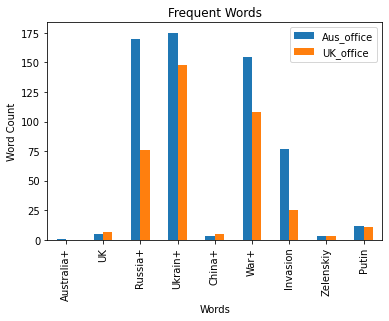

In [46]:
# Visualise the results
df3_transposed = df3.T
print(df3_transposed)
df3_transposed.plot( kind="bar",title = "Frequent Words", xlabel = "Words", ylabel = "Word Count")
plt.show()

### 5. Insight

After analysing the most frequent words, I noticed two major differences between the headlines by the office of Australia and the office of the UK. 
The name of the Ukrainian president, "Zelenskiy", is repeated 24 times in the Australian headlines while it has not appeared in any of the UK headlines. It's unclear why such an important name in this conflict does not show up in the UK headlines. It seems to be an intentional editorial policy in the UK office. On the other hand, "Putin" is used almost similarly. 
Also, "China" is repeated 8 times in the Australian headlines while it has been mentioned only once in the UK headlines. It could show how concerned the Australian office is with the reaction of China to this conflict.

The word "war" has projected in the UK headlines more than twice the Australian headlines whereas the word "invasion" is used in both not much differently. The more repeated the word war is, the more it seems as a conflict with equal parties to it. It seems the word "invasion" is a more relevant word in this context as the Russian territory is not involved in any kind of armed conflict and the fight is all occurring in the Ukrainian territory.

The word "UK" is repeated in both headlines almost the same, though the word "Australia" is not present in any of the UK headlines. It makes sense as the UK is one of the major players in the international scene. 

The use of word "Russia" and "Ukraine" in both headlines is not much different as far as the numbers are concerned, though the focus of the Australian headlines is slightly more on Russia, whereas the UK headlines have focused on Ukraine more. It might not represent any certain agenda. 

Note: The numbers I have mentioned in the insight are valid as of 25-04-2022. Since the API fetches live data, my numbers could be different from the new ones. 
